In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pickle

# Models to Tests

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import cross_validate

# Scaler

In [116]:
from sklearn.preprocessing import StandardScaler

In [2]:
raw_df = pd.read_csv("data\CleanData.csv", index_col=0)

In [3]:
raw_df.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Neighborhood full name
Order,,,,,,,,,,,,,,,,,,,,,
1,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,5,2010,WD,Normal,215000,North Ames
2,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,120,0,0,6,2010,WD,Normal,105000,North Ames
3,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,12500,6,2010,WD,Normal,172000,North Ames
4,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,4,2010,WD,Normal,244000,North Ames
5,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,3,2010,WD,Normal,189900,Gilbert


In [131]:
def ml(df, model, grid, grid_params = 0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

    
    if grid:
        model = GridSearchCV(model, grid_params)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print("R2 Score ", r2_score(y_test, preds))
    print('MAE:', metrics.mean_absolute_error(y_test, preds))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))
    print('RMAE:', metrics.mean_absolute_error(y_test, preds)/np.mean(y_test)*100, "%")
    plt.scatter(y_test, preds)
    plt.plot(y_test, y_test, 'r')
    plt.title("Preds vs True Values")
    if grid:
        print(model.best_params_)

# Correlation

<AxesSubplot:>

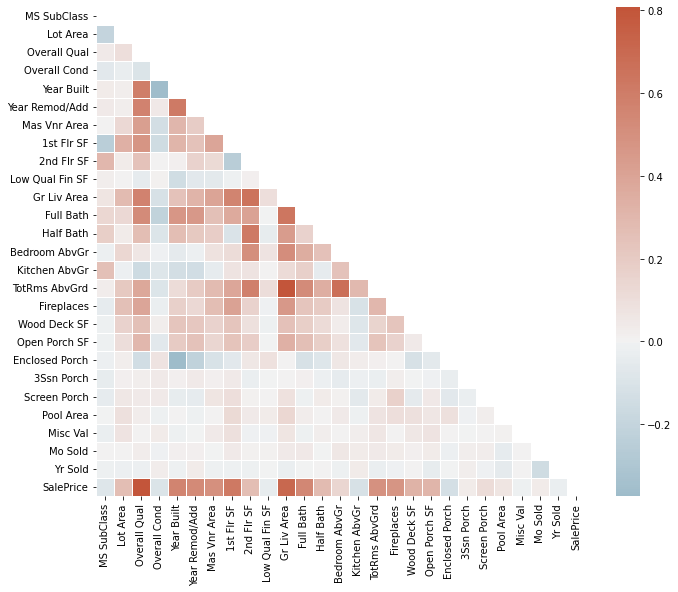

In [5]:
corr = raw_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

In [6]:
corr["SalePrice"][corr["SalePrice"] > 0.1]

Lot Area          0.266549
Overall Qual      0.799262
Year Built        0.558426
Year Remod/Add    0.532974
Mas Vnr Area      0.502196
1st Flr SF        0.621676
2nd Flr SF        0.269373
Gr Liv Area       0.706780
Full Bath         0.545604
Half Bath         0.285056
Bedroom AbvGr     0.143913
TotRms AbvGrd     0.495474
Fireplaces        0.474558
Wood Deck SF      0.327143
Open Porch SF     0.312951
Screen Porch      0.112151
SalePrice         1.000000
Name: SalePrice, dtype: float64

In [7]:
corr["SalePrice"][corr["SalePrice"] < -0.05]

MS SubClass      -0.085092
Overall Cond     -0.101697
Kitchen AbvGr    -0.119814
Enclosed Porch   -0.128787
Name: SalePrice, dtype: float64

### Thoughts

Observations such as the high correlation between price and overall quality, area above ground level and area on the second floor are not surprising.
However, the discovery that the overall condition of a house is gently but nevertheless inversely correlated with price is quite intriguing and warrants further analysis.

# Dealing with outliers

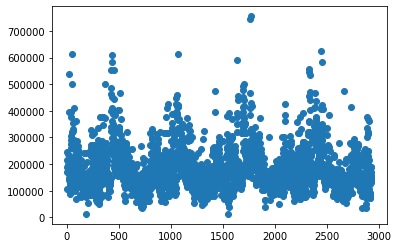

In [8]:
plt.scatter(x = raw_df.index, y = raw_df["SalePrice"])

In [9]:
min(raw_df["SalePrice"])

12789

In [10]:
len(raw_df)/100*2 #2% is ~ 58 records 

58.6

# We decided to remove 2% of the most expensive apartments and 2% of the cheapest ones

In [11]:
without_outliers = raw_df.sort_values(by="SalePrice")

In [12]:
without_outliers

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Neighborhood full name
Order,,,,,,,,,,,,,,,,,,,,,
182,30,RM,9656,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,0,0,0,0,6,2010,WD,Abnorml,12789,Old Town
1554,20,A (agr),14584,Pave,Reg,Low,AllPub,Inside,Mod,IDOTRR,...,0,0,0,0,2,2008,WD,Abnorml,13100,Iowa DOT and Rail Road
727,30,C (all),7879,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,0,0,0,11,2009,WD,Abnorml,34900,Iowa DOT and Rail Road
2844,30,RL,8088,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,0,0,0,0,2,2006,ConLD,Normal,35000,Edwards
2881,20,C (all),9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,0,0,0,10,2006,WD,Abnorml,35311,Iowa DOT and Rail Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,20,RL,12919,Pave,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,0,0,0,3,2010,New,Partial,611657,Northridge Heights
1064,20,RL,12720,Pave,Reg,HLS,AllPub,Inside,Mod,NridgHt,...,0,216,144,0,2,2008,WD,Normal,615000,Northridge Heights
2446,60,RL,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,...,0,0,0,0,7,2006,WD,Normal,625000,Northridge


In [13]:
without_outliers1 = without_outliers.head(2872)

In [14]:
without_outliers1

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Neighborhood full name
Order,,,,,,,,,,,,,,,,,,,,,
182,30,RM,9656,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,0,0,0,0,6,2010,WD,Abnorml,12789,Old Town
1554,20,A (agr),14584,Pave,Reg,Low,AllPub,Inside,Mod,IDOTRR,...,0,0,0,0,2,2008,WD,Abnorml,13100,Iowa DOT and Rail Road
727,30,C (all),7879,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,0,0,0,11,2009,WD,Abnorml,34900,Iowa DOT and Rail Road
2844,30,RL,8088,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,...,0,0,0,0,2,2006,ConLD,Normal,35000,Edwards
2881,20,C (all),9000,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,0,0,0,10,2006,WD,Abnorml,35311,Iowa DOT and Rail Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,60,RL,46589,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidge,...,0,0,0,0,7,2009,WD,Normal,402000,Northridge
431,20,RL,12220,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,0,0,0,9,2009,New,Partial,402861,Northridge Heights
496,60,RL,15138,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,...,0,0,0,0,7,2009,WD,Normal,403000,Northridge


In [15]:
without_outliers2 = without_outliers1.tail(2814)

In [16]:
without_outliers2

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Neighborhood full name
Order,,,,,,,,,,,,,,,,,,,,,
2289,160,RM,2001,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,1,2007,WD,Normal,75000,Meadow Village
944,30,C (all),10200,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,0,0,0,5,2009,WD,Normal,75000,Iowa DOT and Rail Road
2678,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,...,0,0,0,0,11,2006,ConLI,Abnorml,75000,Brookside
2291,160,RM,1890,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,4,2007,COD,Normal,75190,Meadow Village
2238,30,RM,3672,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,...,0,0,0,0,9,2007,WD,Normal,75200,Iowa DOT and Rail Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,60,RL,46589,Pave,IR2,Lvl,AllPub,CulDSac,Gtl,NoRidge,...,0,0,0,0,7,2009,WD,Normal,402000,Northridge
431,20,RL,12220,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,0,0,0,9,2009,New,Partial,402861,Northridge Heights
496,60,RL,15138,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,...,0,0,0,0,7,2009,WD,Normal,403000,Northridge


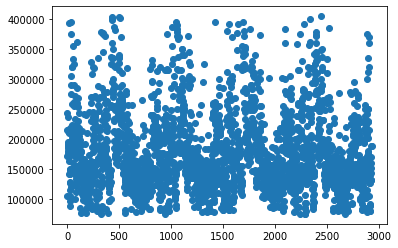

In [17]:
plt.scatter(x = without_outliers2.index, y = without_outliers2["SalePrice"])

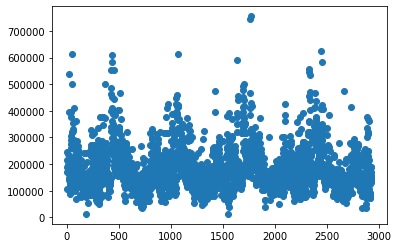

In [18]:
plt.scatter(x = raw_df.index, y = raw_df["SalePrice"])

## Dummies Variables with first column drop

In [19]:
dummies_df = pd.get_dummies(without_outliers2, drop_first = True)

# Spliting on X and y labels and train/test split with test size = 20%

In [102]:
y = dummies_df["SalePrice"]

In [103]:
X = dummies_df.drop(axis = 1, labels = "SalePrice")

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [105]:
X_train

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,1st Flr SF,2nd Flr SF,Low Qual Fin SF,...,Neighborhood full name_Northridge Heights,Neighborhood full name_Northwest Ames,Neighborhood full name_Old Town,Neighborhood full name_Sawyer,Neighborhood full name_Sawyer West,Neighborhood full name_Somerset,Neighborhood full name_South & West of Iowa State University,Neighborhood full name_Stone Brook,Neighborhood full name_Timberland,Neighborhood full name_Veenker
Order,,,,,,,,,,,,,,,,,,,,,
1858,120,3840,8,6,1978,1998,0.0,1295,0,0,...,0,0,0,0,0,0,0,0,0,0
1896,20,22002,6,7,1959,1991,136.0,1652,0,0,...,0,0,0,0,0,0,0,0,0,0
2150,60,8158,7,5,2002,2002,214.0,860,869,0,...,0,0,0,0,0,0,0,0,0,0
2112,60,9316,7,5,2005,2006,0.0,879,916,0,...,0,0,0,0,0,0,0,0,0,0
2013,45,6120,5,7,1939,1950,0.0,884,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,80,7700,5,7,1956,1956,0.0,1145,0,0,...,0,0,0,0,0,0,0,0,0,0
2440,60,10852,6,5,2000,2000,0.0,959,712,0,...,0,0,0,0,0,0,0,0,0,0
1913,80,9600,6,5,1961,1961,291.0,1254,0,0,...,0,0,0,0,0,0,0,0,0,0


# Standard Scaler

In [117]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Cross Validation Test 
## Best Models Selections

In [110]:
models = [SVR(),Ridge(), LinearRegression(), KNeighborsRegressor(),
         DecisionTreeRegressor(),RandomForestRegressor()]

In [35]:
for model in models:
    cv_score = cross_val_score(model, X, y, cv = 10, scoring = "neg_mean_absolute_error")
    print(model,"",abs(cv_score.mean()))

SVR()  57541.444752348194
Ridge()  19755.436947718328
LinearRegression()  2096909.60211237
KNeighborsRegressor()  37540.118304686905
DecisionTreeRegressor()  30541.66391938618
RandomForestRegressor()  24565.16288984798


### ad.1 The discrepancy in the result of two linear models that are linear regression and ridge may suggest that a sizable portion of features are without utility in estimating the price of a house. We will use mrmr selection: https://github.com/smazzanti/mrmr to reduce number of useless features

### ad.2 Given that the results of all models excluding SVR and linear regression are similar to each other. We decided to further develop the other four in the project, i.e.
### -Ridge
### -KNeighborsRegressor
### -DecisionTreeRegressor
### -RandomForestRegressor

# Ridge Regression (least squares regression with an L2 penalty term)

In [132]:
from sklearn.linear_model import Ridge 

In [133]:
grid_params = {
    'alpha': [0.15,0.5,1,1.5,2,5,10,20],
    'tol': [0.00001,0.00002,0.0001,.0005,0.01],
    'random_state' : [101]
}

In [134]:
ridge = Ridge()

R2 Score  0.8887900826903842
MAE: 14901.045507788966
RMSE: 21780.933715421615
RMAE: 8.47612722236853 %
{'alpha': 10, 'random_state': 101, 'tol': 1e-05}


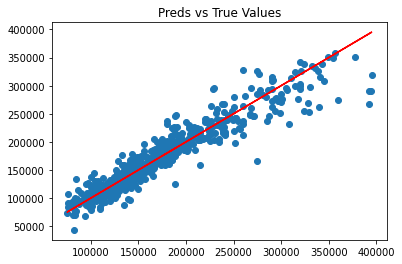

In [135]:
ml(dummies_df, ridge, True, grid_params)

### Thoughts: Ridge Regression make really nice job R2Score = 0,89
### With params : {'alpha': 10, 'random_state': 101, 'tol': 1e-05}

# KNN regression

In [136]:
KNeighborsRegressor()

KNeighborsRegressor()

In [137]:
grid_params = {
    'n_neighbors': [3,5,7,9,11,15,19,21],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto'],
    'metric': ['cityblock', 'l1', 'l2']

}

R2 Score  0.6916407561055088
MAE: 25302.37817303733
RMSE: 36268.80282859065
RMAE: 14.392693204717807 %
{'algorithm': 'auto', 'metric': 'cityblock', 'n_neighbors': 9, 'weights': 'distance'}


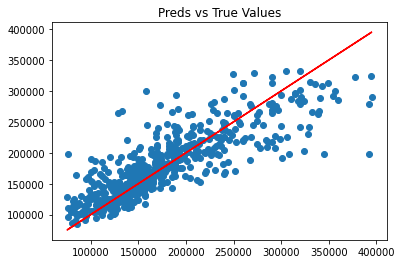

In [138]:
ml(dummies_df, KNeighborsRegressor(), True, grid_params)

### Thoughts: KNN Regresor is much weaker then ridge so we decided to not loading it.


# DecisionTreeRegressor

In [145]:
DecisionTreeRegressor()

DecisionTreeRegressor()

In [146]:
grid_params = {
    'criterion' : ["absolute_error"], 
    'random_state': [101],
    'min_impurity_decrease':[0.0001,0.0002,0.0005,0.001],
    'ccp_alpha': [0.1,0.2,0.3,0.4,0.5,0.6]


}

R2 Score  0.758458071674649
MAE: 21642.96269982238
RMSE: 32099.701881054527
RMAE: 12.311116372121695 %
{'ccp_alpha': 0.3, 'criterion': 'absolute_error', 'min_impurity_decrease': 0.0001, 'random_state': 101}


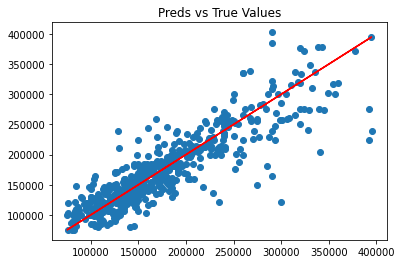

In [147]:
ml(dummies_df, DecisionTreeRegressor(), True, grid_params)

# Analyse Houses by Sold Year 2006-2010

In [31]:
table = pd.pivot_table(raw_df, values='SalePrice', index='Yr Sold',
                     aggfunc=[np.median, 'count'])

In [32]:
df_2006 = pd.read_csv("C:/Users/kacpe/Desktop/uczelnia/sem4/Projekt Systemy/data/2006.csv")
df_2007 = pd.read_csv("C:/Users/kacpe/Desktop/uczelnia/sem4/Projekt Systemy/data/2007.csv")
df_2008 = pd.read_csv("C:/Users/kacpe/Desktop/uczelnia/sem4/Projekt Systemy/data/2008.csv")
df_2009 = pd.read_csv("C:/Users/kacpe/Desktop/uczelnia/sem4/Projekt Systemy/data/2009.csv")
df_2010 = pd.read_csv("C:/Users/kacpe/Desktop/uczelnia/sem4/Projekt Systemy/data/2010.csv")

In [33]:
df_2010

,Order,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Neighborhood full name
0,1,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,5,2010,WD,Normal,215000,North Ames
1,2,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,120,0,0,6,2010,WD,Normal,105000,North Ames
2,3,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,12500,6,2010,WD,Normal,172000,North Ames
3,4,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,4,2010,WD,Normal,244000,North Ames
4,5,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,3,2010,WD,Normal,189900,Gilbert
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,337,90,RL,7700,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,600,2,2010,WD,Normal,159000,Mitchell
337,338,60,RL,10475,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,3,2010,WD,Normal,136000,Mitchell
338,339,50,RL,10544,Pave,IR1,Lvl,AllPub,Inside,Mod,...,0,0,0,0,4,2010,WD,Normal,161000,Mitchell
339,340,20,RL,9892,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,2,2010,WD,Normal,285000,Mitchell
